<a href="https://colab.research.google.com/github/bugsotim/dataviz2025/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Visualize_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การแสดงผลการกระจายของข้อมูล

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
path_to_stopandsearch = '/content/drive/MyDrive/Data_Viz_2025/Data/2025-01/2025-01-bedfordshire-stop-and-search .csv'
stop_and_search = pd.read_csv(path_to_stopandsearch)
stop_and_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


แปลงค่า Gender และ Age range เป็นจำนวนจริง

In [48]:
stop_and_search.groupby('Gender').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Gender,,,,,,,,,,,,,,
Female,40,40,40,0,34,34,40,39,37,40,40,40,10,40
Male,287,287,287,0,240,240,278,280,276,287,287,287,107,287


In [50]:
stop_and_search.groupby('Age range').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Age range,,,,,,,,,,,,,,
10-17,45,45,45,0,39,39,43,42,42,45,45,45,17,45
18-24,99,99,99,0,84,84,84,96,97,99,99,99,41,99
25-34,80,80,80,0,63,63,71,79,75,80,80,80,32,80
over 34,126,126,126,0,104,104,119,122,122,126,126,126,40,126
under 10,1,1,1,0,1,1,1,1,1,1,1,1,0,1


In [51]:
stop_and_search.shape

(387, 15)

In [52]:
stop_and_search_dropna = stop_and_search.dropna(subset=['Gender','Age range']).copy()

In [53]:
stop_and_search_dropna['Gender'] = stop_and_search_dropna['Gender'].replace({'Male': 35 , 'Female': 1})
display (stop_and_search_dropna.head())

/tmp/ipython-input-2327763561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stop_and_search_dropna['Gender'] = stop_and_search_dropna['Gender'].replace({'Male': 35 , 'Female': 1})
/tmp/ipython-input-2327763561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_and_search_dropna['Gender'] = stop_and_search_dropna['Gender'].replace({'Male': 35 , 'Female': 1})


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,35,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


In [63]:
stop_and_search_dropna['Age range'] = stop_and_search_dropna['Age range'].replace({'10-17': 14, '18-24': 21 , '25-34' : 30 , 'over 34' : 35, 'under 10': 10})
display (stop_and_search_dropna.head())

/tmp/ipython-input-1327600096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_and_search_dropna['Age range'] = stop_and_search_dropna['Age range'].replace({'10-17': 14, '18-24': 21 , '25-34' : 30 , 'over 34' : 35, 'under 10': 10})


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,34.689520,30,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,32.596533,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,33.938289,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,0.887406,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,38.836722,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


In [64]:
import numpy as np
list_of_random_number = np.random.normal(loc=1 , scale=0.1 , size=len(stop_and_search_dropna))

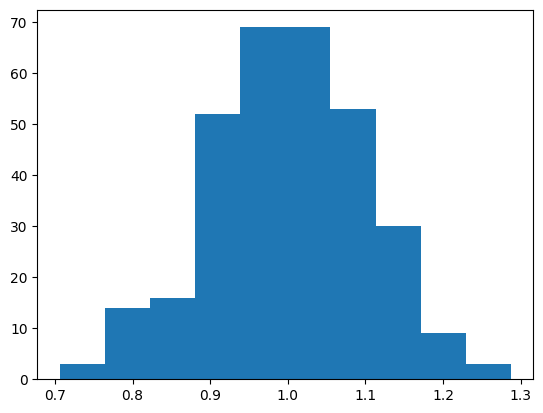

In [65]:
plt.hist(list_of_random_number);

In [66]:
stop_and_search_dropna['Gender'] = stop_and_search_dropna['Gender'] * list_of_random_number

/tmp/ipython-input-6956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_and_search_dropna['Gender'] = stop_and_search_dropna['Gender'] * list_of_random_number


In [68]:
stop_and_search_dropna['Age range'] = stop_and_search_dropna['Age range'] *np.random.normal(loc=1 , scale=0.1 , size=len(stop_and_search_dropna))

/tmp/ipython-input-3142435001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_and_search_dropna['Age range'] = stop_and_search_dropna['Age range'] *np.random.normal(loc=1 , scale=0.1 , size=len(stop_and_search_dropna))


ลบค่าที่เป็น outliers

In [74]:
stopandsearch_df_dropna = stop_and_search_dropna[(stop_and_search_dropna['Gender']>=0) & (stop_and_search_dropna['Gender']<40)]


In [76]:
stop_and_search_dropna.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,32.976548,33.350025,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35.371294,11.170337,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,36.280136,13.977589,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,0.785501,12.289411,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,49.532162,13.772443,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


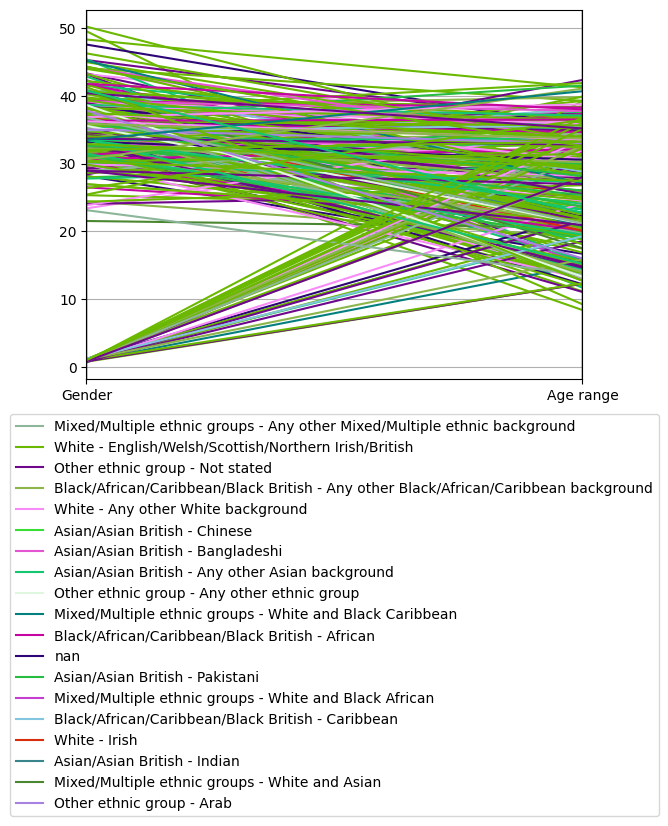

In [82]:
pd.plotting.parallel_coordinates(stop_and_search_dropna[['Gender','Age range','Self-defined ethnicity']],'Self-defined ethnicity')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.2))

## Scatter 2D

## scatter - default

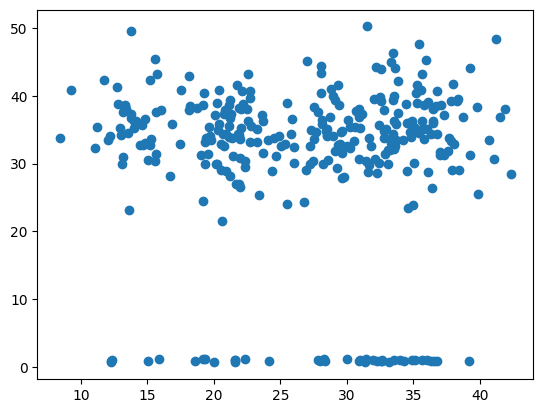

In [78]:
plt.scatter(stop_and_search_dropna['Age range'],stop_and_search_dropna['Gender'])

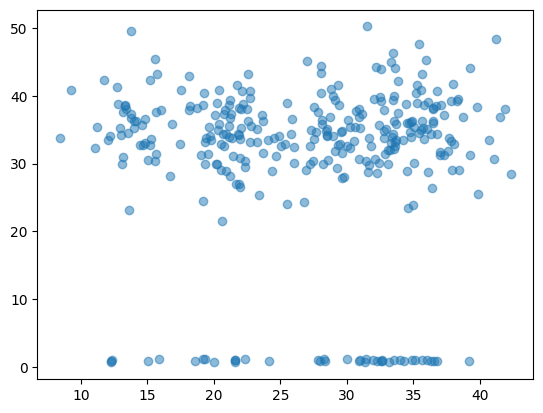

In [84]:
plt.scatter(stop_and_search_dropna['Age range'],stop_and_search_dropna['Gender'],alpha=0.5)

เปลี่ยนสีจุด

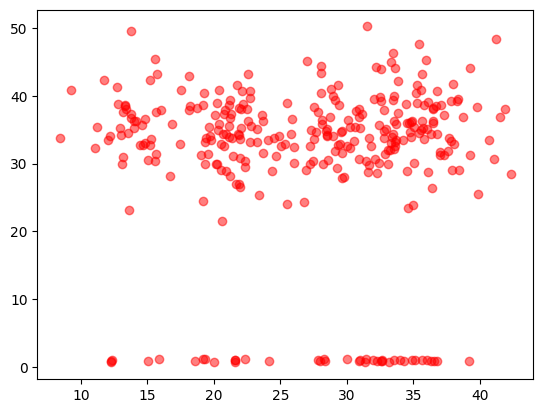

In [87]:
plt.scatter(stop_and_search_dropna['Age range'],stop_and_search_dropna['Gender'],c= 'r' ,alpha=0.5)

## ใช้ค่าสีในการแสดงค่าของ column อื่น

ตัวอย่าง column > officer-defined ethnicity

In [85]:
stop_and_search_dropna.groupby('Officer-defined ethnicity').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Officer-defined ethnicity,,,,,,,,,,,,,,
Asian,72,72,72,0,59,59,72,72,70,72,72,72,29,72
Black,50,50,50,0,40,40,50,50,50,50,50,50,21,50
Other,8,8,8,0,6,6,8,8,8,8,8,8,4,8
White,174,174,174,0,149,149,174,174,168,174,174,174,58,174


แทนค่า string ด้วยตัวเลข

In [91]:
stop_and_search_dropna['Officer-defined ethnicity'] = stop_and_search_dropna['Officer-defined ethnicity'].replace({'Black' : 0, 'Other' : 1 , 'White' : 2 , 'Asian' : 3})

/tmp/ipython-input-1912611275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_and_search_dropna['Officer-defined ethnicity'] = stop_and_search_dropna['Officer-defined ethnicity'].replace({'Black' : 0, 'Other' : 1 , 'White' : 2 , 'Asian' : 3})


TypeError: float() argument must be a string or a real number, not 'method'

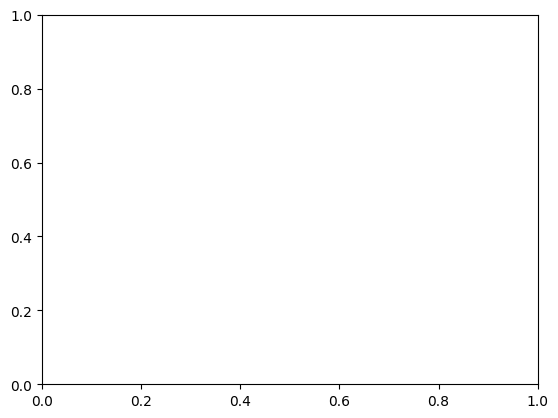

In [93]:
plt.scatter(stop_and_search_dropna['Age range'],stop_and_search_dropna['Gender'],
            c=stop_and_search_dropna['Officer-defined ethnicity'],alpha=0.5)
plt.xlabel('Age range')
plt.ylabel('Gender')
plt.title('Scatter plot of Gender vs Age range colored by Officer-defined ethnicity')
plt.show()

In [31]:
import numpy as np

# Generate random numbers from a normal distribution with standard deviation 5
random_numbers = np.random.normal(loc=0, scale=5, size=len(stop_and_search_dropna))

# Multiply the 'Gender' column by the random numbers
stop_and_search_dropna['Gender_randomized'] = stop_and_search_dropna['Gender'] * random_numbers

# Display the updated DataFrame with the new column
display(stop_and_search_dropna.head())

/tmp/ipython-input-3349137351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_and_search_dropna['Gender_randomized'] = stop_and_search_dropna['Gender'] * random_numbers


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Gender_randomized
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,1,30,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False,-7.053217
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,-6.968428
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,6.403683
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,0,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,-0.000000
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1,14,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,1.339827


### color

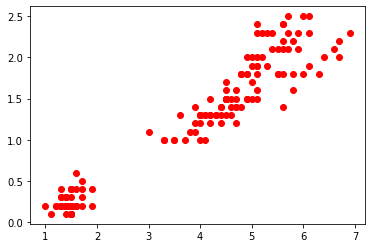

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c='r')

## ใส่สีให้แต่ละจุด

In [ ]:
set(df['Name']) #ดูว่ามีค่าอะไรบ้าง

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [ ]:
df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


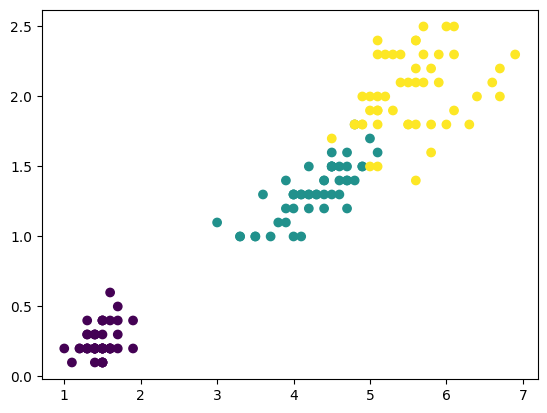

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'])

### alpha กำหนดความโปร่งแสง

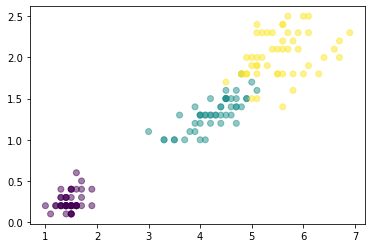

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ใช้ขนาดของ marker แสดงค่าของ feature

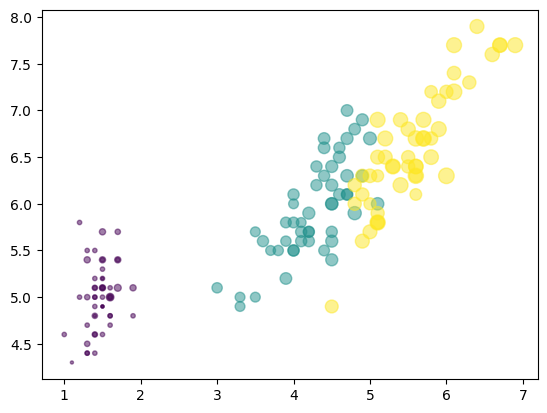

In [ ]:
plt.scatter(df['PetalLength'],df['SepalLength'],s=50*df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker

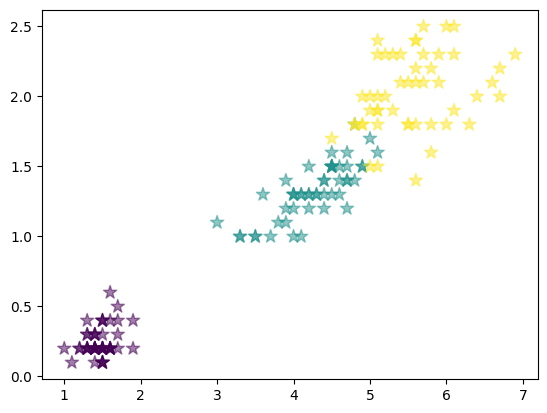

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],s=100,c=df2['Name'],alpha=0.5,marker='*')

## การ plot กราฟหลายๆอันซ้อนกัน

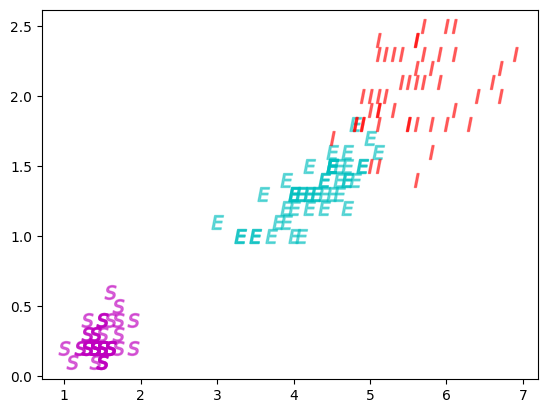

In [ ]:
plt.scatter(df['PetalLength'][:50],df['PetalWidth'][:50],s=100,c='m',alpha=0.5,marker='$S$')
plt.scatter(df['PetalLength'][50:100],df['PetalWidth'][50:100],s=100,c='c',alpha=0.5,marker='$E$')
plt.scatter(df['PetalLength'][100:],df['PetalWidth'][100:],s=100,c='r',alpha=0.5,marker='$I$')

###Label-Legend

```plt.plot()``` input  ตัวที่ 3 คือ ตัวกำหนดหน้าตาของ marker

'หน้าตาmarker'-'ลักษณะของเส้นเชื่อมจุด'-'สี'

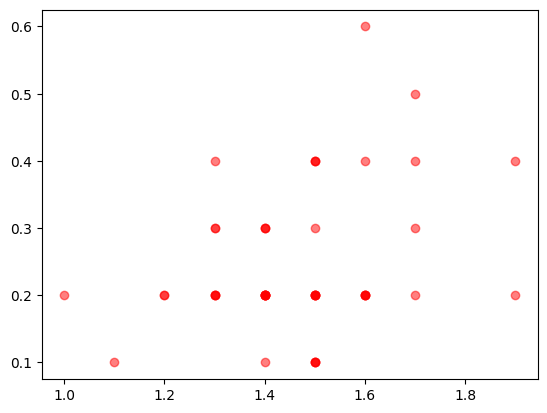

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5)

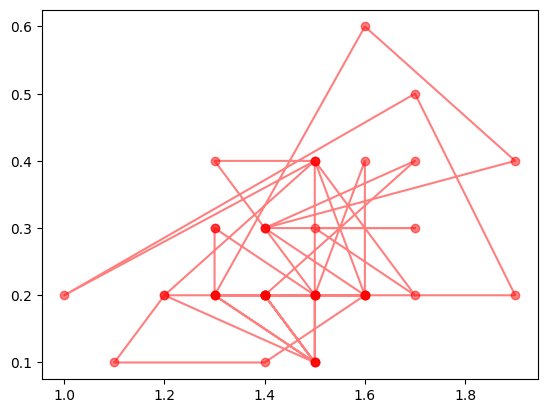

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o-r',alpha=0.5)

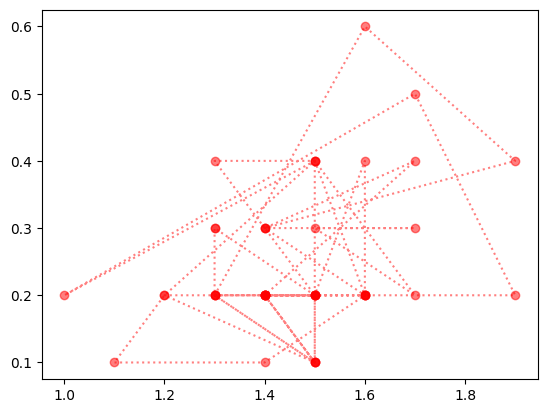

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o:r',alpha=0.5)

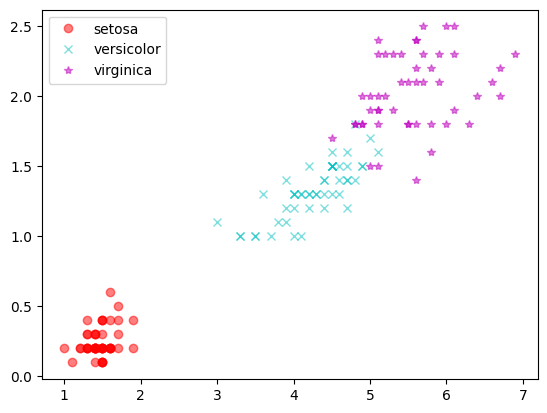

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend()

### การใส่ชื่อกราฟ และชื่อแกน

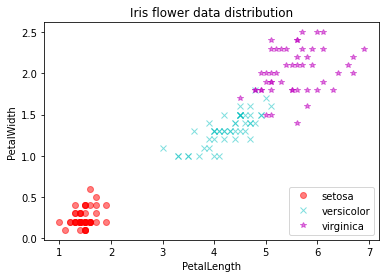

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend(loc='lower right')
plt.title('Iris flower data distribution') ##ชื่อกราฟ
plt.xlabel('PetalLength') ##ชื่อแกน X
plt.ylabel('PetalWidth'); ##ชื่อแกน y

### 3D scatter

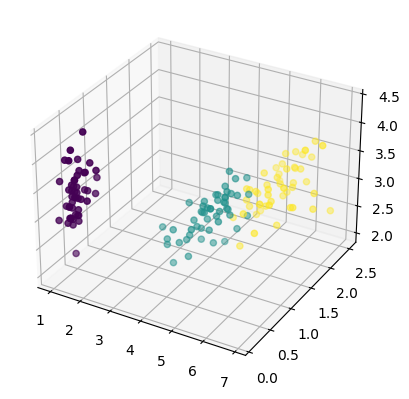

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter3D(df['PetalLength'],df['PetalWidth'],df['SepalWidth'],c=df2['Name'])

## Bubble Chart

Scatter plot ที่ใช้ขนาดของ marker ในการสื่อปริมาณของข้อมูล

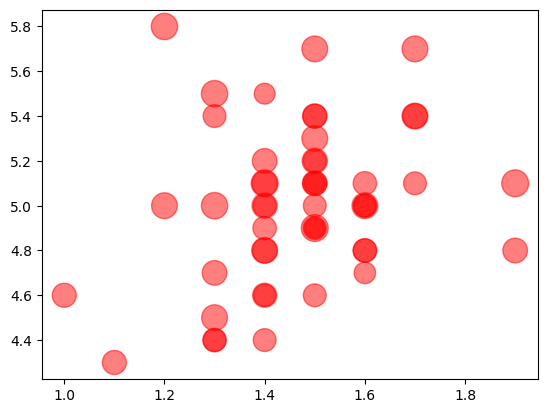

In [ ]:
plt.scatter(df['PetalLength'][:50],df['SepalLength'][:50],s=150*df['PetalWidth'][100:],c='r',alpha=0.5)

### Example

### Box-plot

In [ ]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


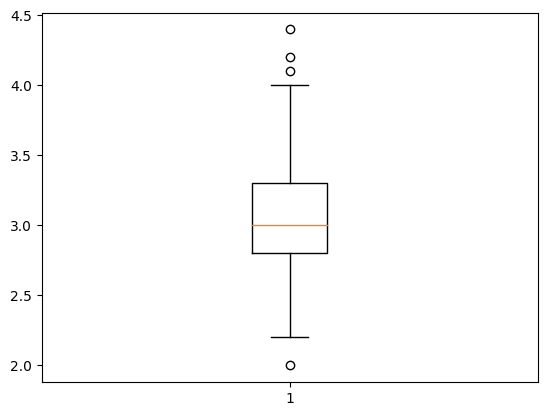

In [ ]:
O = plt.boxplot(df['SepalWidth'])

In [ ]:
O

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8067d32500>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8067d32a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8067d32260>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8067d32f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8067d33220>],
 'means': []}

In [ ]:
O['fliers']

In [ ]:
O['fliers'][0]

In [ ]:
dir(O['fliers'][0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_dash_pattern',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_default_contains',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_fully_clipped_to_axes',
 '_gapcolor',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_invalidx',
 '_invalidy',
 '_is_sorted',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth

In [ ]:
O['fliers'][0].get_ydata()

array([2. , 4.4, 4.1, 4.2])

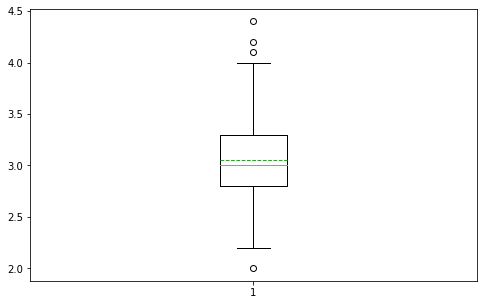

In [ ]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True)

In [ ]:
O

{'boxes': [<matplotlib.lines.Line2D at 0x7f7f44299ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7f44220f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f4422e490>],
 'means': [<matplotlib.lines.Line2D at 0x7f7f44226f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f44226a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7f44220490>,
  <matplotlib.lines.Line2D at 0x7f7f442209d0>]}

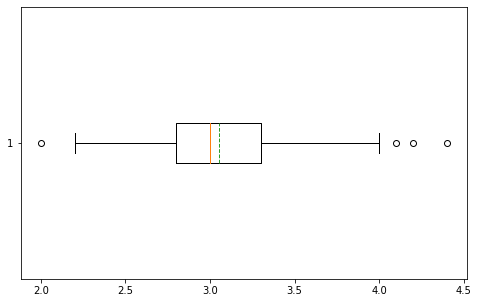

In [ ]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True,vert=False)

# HW7 plot กราฟ แสดง การกระจายของข้อมูลใน india imdb และ มาพรีเซ็น เป็นกลุ่ม (2 กราฟ)